# A3 Segmentation and Stereo Vision 
Student Name: Fulin Huang 

Student ID: 260740689

# 1 Segmentation

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

### 1.1 K-means clustering 

#### 1 Implement the K-means clustering algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for clustering.

#### 2 Apply K-means to segment the image using [R,G,B] features. (R,G,B) represents color channels normalized between 0 and 1.

#### 3 Display the resulting segmented images for the first 10 iterations.

In [278]:
def k_means(image, k, numOfIteration):
    
    # Randomly initialize the k cluster center
    rgbchannel = 3
    max_val = 255.0
    clusters = np.random.uniform(0, max_val, [k, rgbchannel])
    print("Initial clusters ", clusters)
    k_mean_image = image.copy()    

    images = []
    for i in range(numOfIteration):
        print("Iteration {} ...".format(i+1))
                
        # Compute distance from points to each center 
        distances = [] 
        for j in clusters: 
            distance = k_mean_image - j
            distances.append(distance)
        
        # Assign a cluster center that is the closest
        clusters_index = np.argmin(np.linalg.norm(distances, axis=-1), axis = 0)
#         print("distance", distances)
#         print(clusters_index)

        # K-mean result 
        images.append(clusters_index)

        # Update cluster centers 
        for i in range(k): 
            # Calculate the cluster center based on the points in the cluster
            assign = k_mean_image[clusters_index == i]
            clusters[i] = np.mean(assign)
    
        print("New Clusters ", clusters)
        
    return images


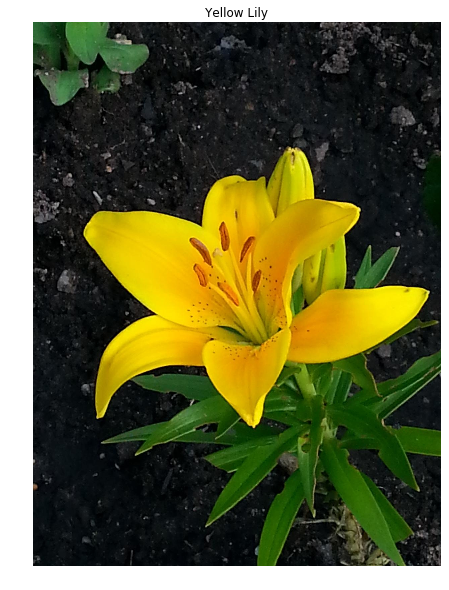

Initial clusters  [[210.81132042 229.55806653 215.47465897]
 [108.76861539  69.03499252 199.0103234 ]]
Iteration 1 ...
New Clusters  [[138.79959374 138.79959374 138.79959374]
 [ 30.82497819  30.82497819  30.82497819]]
Iteration 2 ...
New Clusters  [[130.02932472 130.02932472 130.02932472]
 [ 25.36654039  25.36654039  25.36654039]]
Iteration 3 ...
New Clusters  [[127.27222019 127.27222019 127.27222019]
 [ 24.32749035  24.32749035  24.32749035]]
Iteration 4 ...
New Clusters  [[126.50798843 126.50798843 126.50798843]
 [ 24.0613697   24.0613697   24.0613697 ]]
Iteration 5 ...
New Clusters  [[126.285284   126.285284   126.285284  ]
 [ 23.98579271  23.98579271  23.98579271]]
Iteration 6 ...
New Clusters  [[126.285284   126.285284   126.285284  ]
 [ 23.98579271  23.98579271  23.98579271]]
Iteration 7 ...
New Clusters  [[126.285284   126.285284   126.285284  ]
 [ 23.98579271  23.98579271  23.98579271]]
Iteration 8 ...
New Clusters  [[126.285284   126.285284   126.285284  ]
 [ 23.98579271  23.9

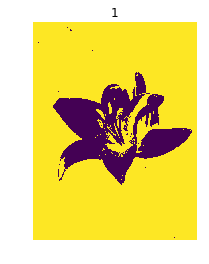

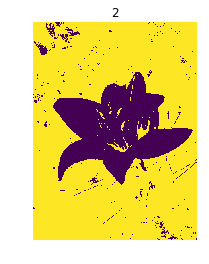

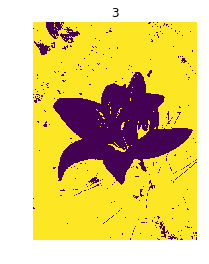

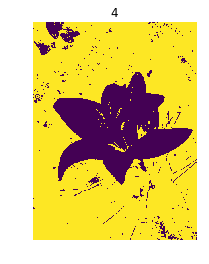

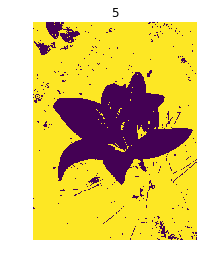

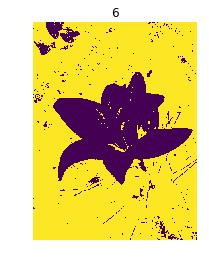

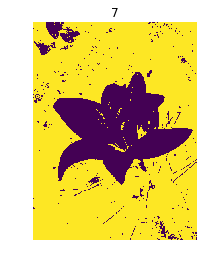

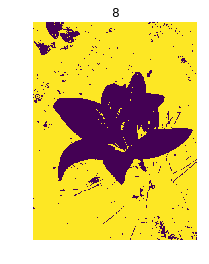

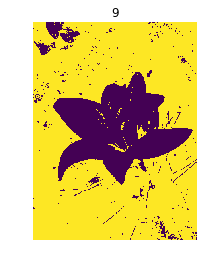

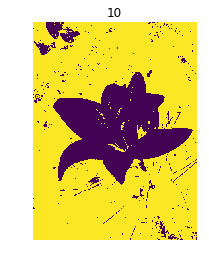

In [281]:
# Read and Display Image 
yellowlily = cv2.imread('yellowlily.png')
yellowlily = cv2.cvtColor(yellowlily, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(yellowlily),plt.title("Yellow Lily")
plt.axis('off'), plt.show()

# Apply K-means to segment the image and display 10 results 
images = k_means(yellowlily, 2, 10)

# Display 10 images 
print(len(images))
for i in range(len(images)): 
    plt.title(i+1), plt.imshow(images[i])
    plt.axis('off'), plt.show()


### 1.2 Expectation Maximization - Gaussian Mixture Models
#### 1 Implement the EM algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for the overall EM algorithm.
#### 2 Apply GMM to the provided image using the [R,G,B] features. (R,G,B) represents color channels normalized between 0 and 1.
#### 3 Display the resulting segmented images for the first 10 iterations.

In [77]:
def Expectation_Maximization(image, c, numOfIteration, mean, std, prob): 
    
    # Initialize Return 
    em_image = [] 
    
    for i in range(numOfIteration):
        print("Iteration {} ...".format(i+1))
        
        # E Step 
        prob_point = []
        for h in range(image.shape[0]):
            for w in range(image.shape[1]):
                
                x = image[h][w]
                # Determine the probability that a Gaussian component is assigned to each sample (xi) based on current estimate of the parameter 
                # f(x, mean, std) = (1/mean*sqrt(2pi))*e^((-(x-mean)^2)/2*std^2)
                std_term = 1 / (std * math.sqrt(2 * math.pi))
                e_term = (-np.power((x - mean),2))/(2*np.power(std,2))
                e_pow = np.power(math.e, e_term)
                prob_val = std_term * e_pow
                # Norm
                prob_val = np.linalg.norm(prob_val, axis = -1)
                prob_point.append(prob_val)
                
        # Calculate probability per term. Reshape for easier calculation
        prob_point = prob_point * prob
        prob_point = np.array(prob_point).reshape(image.shape[0], image.shape[1], c)
    
        # Calculate Sum and probability
        sum_prob= sum(prob_point)
        
        #Calculate Probability
        prob_point /= sum_prob
#         print(prob_point)

        # Assign clusters 
        clusters = np.argmax(prob_point, axis=-1)
#         print(clusters)

        # Append Result
        em_image.append(clusters)
              
        # M Step 
        for cluster in range(c):
            for h in range(image.shape[0]):
                for w in range(image.shape[1]):
                    xi = image[h][w]
                    Xi_p = 0
                    Xi_p += xi * prob_point[h][w][cluster]
                    
            # Number of pixels belong to a cluster 
            numPixels = image[clusters == cluster]
            
            # Update probability, mean and standard deviation for each cluster 
            prob[cluster] = np.sum(prob_point[:, :, cluster])/np.size(image)
            mean[cluster] = Xi_p / np.sum(prob_point[:, :, cluster])
            std[cluster] = np.std(numPixels, axis=0)
            
            # Check Updated Parameters 
#             print("--- Updated Parameters ---")
#             print("prob", prob[cluster])
#             print("mean", mean[cluster])
#             print("std", std[cluster])
                    
    return em_image


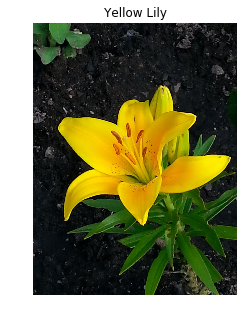

Iteration 1 ...
Iteration 2 ...
Iteration 3 ...
Iteration 4 ...
Iteration 5 ...
Iteration 6 ...
Iteration 7 ...
Iteration 8 ...
Iteration 9 ...
Iteration 10 ...


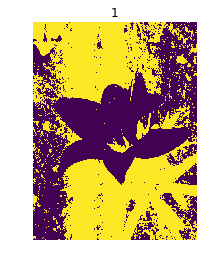

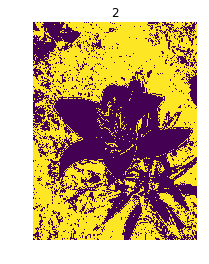

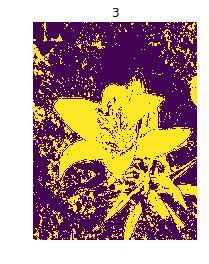

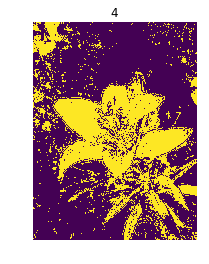

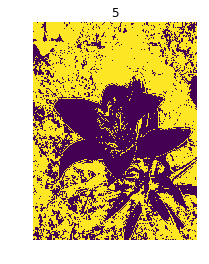

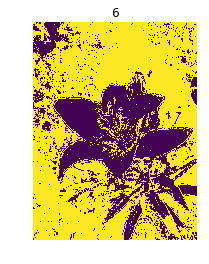

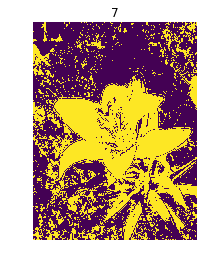

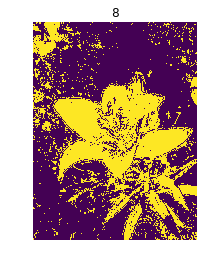

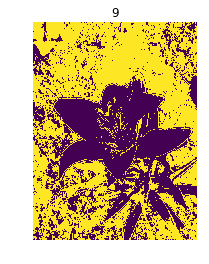

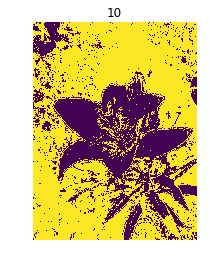

In [78]:
# Display Original Image
EM_image = yellowlily.copy() 
plt.figure(figsize=(5,5))
plt.imshow(yellowlily),plt.title("Yellow Lily")
plt.axis('off'), plt.show()

# Initialize parameters mean, std and probability 
c = 2
numOfIteration = 10
rgbchannel = 3
max_val = 255.0
std_val = max_val / c
    
mean = np.random.uniform(0, max_val, [c, rgbchannel])
std = np.full((c, rgbchannel), std_val)
prob = [np.random.uniform(0, 1) for i in range(2)]
prob /= np.sum(prob)

# Compute EM 
output = Expectation_Maximization(EM_image, c, numOfIteration, mean, std, prob)

# Display Images
for i in range(len(output)): 
    plt.title(i+1), plt.imshow(output[i])
    plt.axis('off'), plt.show()


### 1.3 Reasoning question

#### 1 Under what data distribution conditions would K-means and EM give the same solution, provided similar initializations?

A k-means cluster has circular shape while a EM Gaussian Mixture Model cluster can have ellipsoid shape. If the data is of ellipsoid shape, a k-means model will not be accurate because the clusters are always circular shaped. Hence, to let k-means and EM give the same solution, the data should define by circle shapes.


# 2 Stereo Vision - Epipolar Geometry

#### Use a stereo image-pair of your choice from the Middlebury dataset: http: //vision.middlebury.edu/stereo/data/scenes2014/ for the following ques- tions. You can use functions from OpenCV and matplotlib for this question

#### 1 Compute matching SIFT keypoints from a stereo image pair.

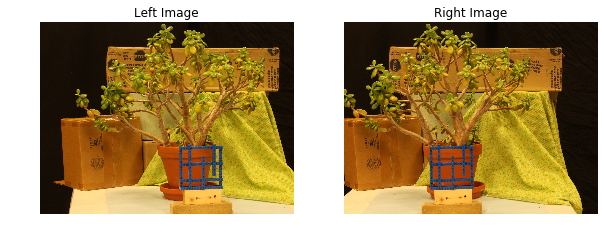

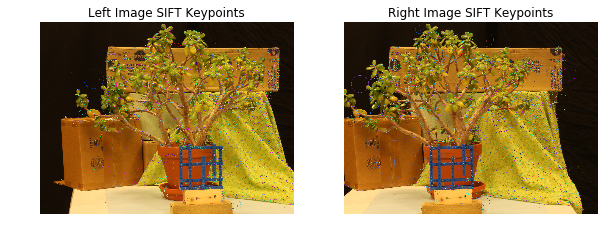

In [496]:
# Display left and right images 
image_left = cv2.imread('im2.png')
image_right = cv2.imread('im3.png')

image_left = cv2.cvtColor(image_left, cv2.COLOR_BGR2RGB)
image_right = cv2.cvtColor(image_right, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.title("Left Image")
plt.axis('off'), plt.imshow(image_left)
plt.subplot(122), plt.title("Right Image")
plt.axis('off'), plt.imshow(image_right)
plt.show()

# Create SIFT object 
sift_obj = cv2.xfeatures2d.SIFT_create() 

# Make Image Copy 
image_left_sift = image_left.copy()
image_right_sift = image_right.copy() 

# compute SIFT keypoint and descriptor 
keypoint_left, des_left = sift_obj.detectAndCompute(image_left, None) 
keypoint_right, des_right = sift_obj.detectAndCompute(image_right, None)

# Draw keypoints 
cv2.drawKeypoints(image_left, keypoint_left, image_left_sift, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(image_right, keypoint_right, image_right_sift, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(10,10))
plt.subplot(121), plt.title("Left Image SIFT Keypoints")
plt.axis('off'), plt.imshow(image_left_sift)
plt.subplot(122), plt.title("Right Image SIFT Keypoints")
plt.axis('off'), plt.imshow(image_right_sift)
plt.show()


#### 2 Compute and display the epipolar lines for both images. 

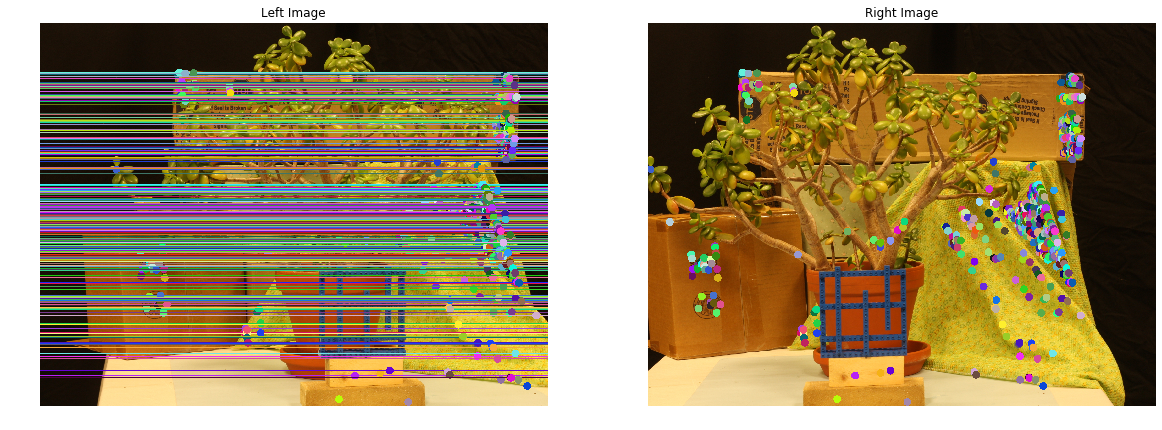

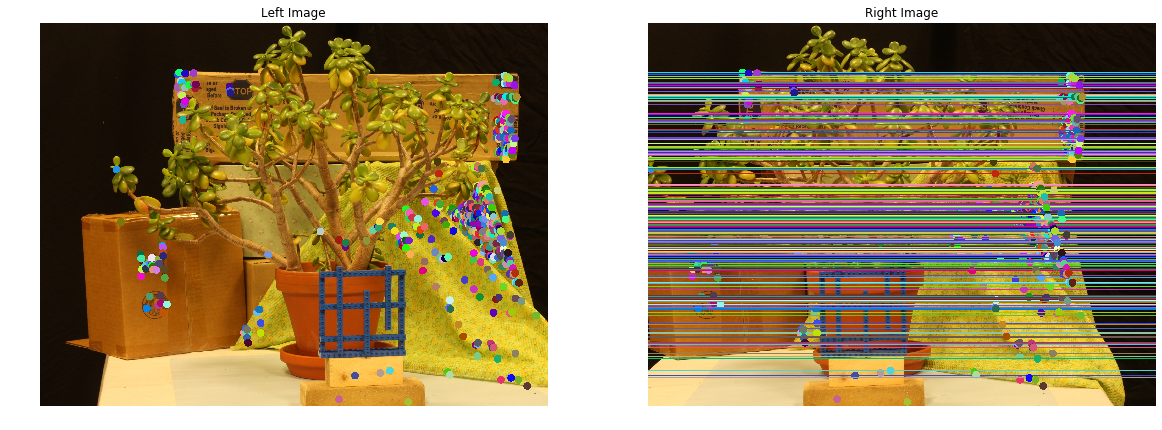

In [497]:
# Create Brute-Force Matcher 
bf_Matcher = cv2.BFMatcher(cv2.NORM_L2)

# Match descriptors 
matches = bf_Matcher.knnMatch(des_left, des_right, k=2)

# Store good matches 
goodMatches = [] 
ptsL = []
ptsR = [] 
for i, (m, n) in enumerate(matches):
    if m.distance < 0.3 * n.distance: 
        goodMatches.append(m)
        ptsR.append(keypoint_right[m.trainIdx].pt)
        ptsL.append(keypoint_left[m.queryIdx].pt)
        
ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)

# Find fundamental matrix 
# The calculated fundamental matrix can be passed further
# to computeCorrespondEpilines() that finds epipolar lines 
# ref: https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# Get inliers 
ptsL = ptsL[mask.ravel()==1]
ptsR = ptsR[mask.ravel()==1]


# Draw Line Function 
def drawlines(img1, img2, lines, pts1, pts2): 
    row,col,_ = img1.shape
    img1 = img1.copy()
    img2 = img2.copy()
    for param, pt1, pt2 in zip(lines, pts1, pts2):
        
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -param[2]/param[1]]) # y = -c/b
        x1, y1 = map(int, [col, -(param[2]+param[0]*col)/param[1]]) # y = (-a * col - c) / b
        # draw lines and points 

        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 2)
        img1 = cv2.circle(img1, tuple(pt1), 20, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 20, color, -1)
    return img1, img2

# Find epilines & Draw Lines
# cv2.ComputeCorrespondEpilines(points, whichImage, F)
# points: input points; which Image: Index of the image(1 or 2) that contains the points
# lines_left: output vector of the epipolar lines corresponding to the points in the other image. 
# Each line ax + by + c = 0 is encoded by 3 numbers (a,b,c)
# Ref: https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html
lines_left = cv2.computeCorrespondEpilines(ptsR, 2, F)
lines_left = lines_left.reshape(-1, 3)
image_left_line_1, image_right_line_1 = drawlines(image_left, image_right, lines_left, ptsL, ptsR)


# Display images 
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(image_left_line_1)
plt.title("Left Image"), plt.axis('off')
plt.subplot(122), plt.imshow(image_right_line_1)
plt.title("Right Image"), plt.axis('off')
plt.show()

# Draw line
lines_right = cv2.computeCorrespondEpilines(ptsL, 1, F)
lines_right = lines_right.reshape(-1, 3)
image_right_line_2, image_left_line_2 = drawlines(image_right, image_left, lines_right, ptsR, ptsL)

# Display Image
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(image_left_line_2)
plt.title("Left Image"), plt.axis('off')
plt.subplot(122), plt.imshow(image_right_line_2)
plt.title("Right Image"), plt.axis('off')
plt.show()

#### 3 Pick any one keypoint in the left image which has a correct match in the right image, and is on the corresponding epipolar line. Extract a patch of size (5 × 5) around this keypoint in the left image. 

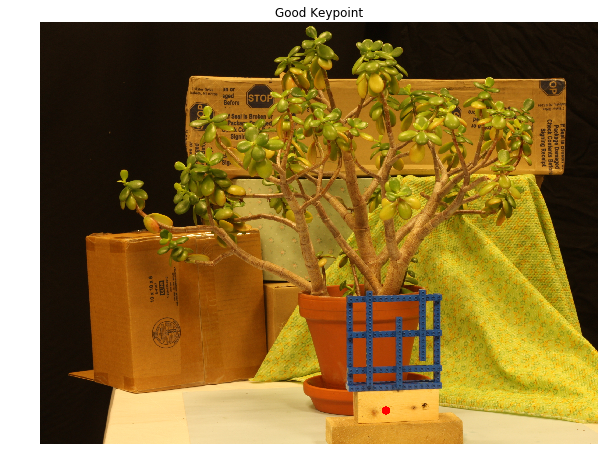

[1632 1830]
(1988, 2632, 3)
(5, 5, 3)


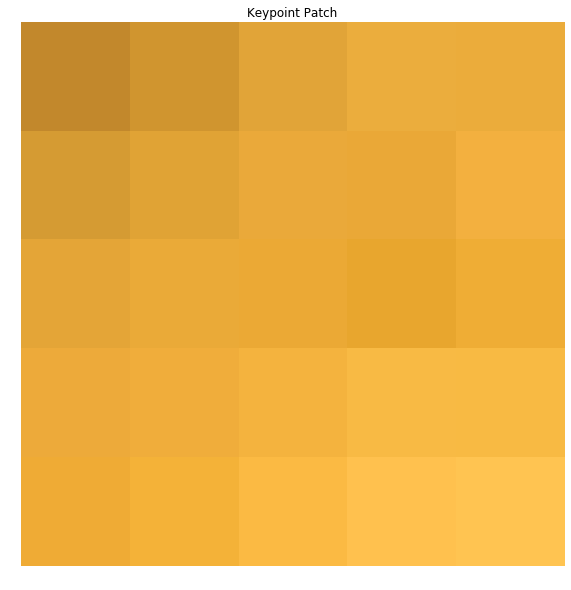

In [500]:
# Pick one good keypoint in the left image 
image_draw_circle = image_left.copy()
keypoint = [] 
randomIndex = 83   #83
keypoint = ptsL[randomIndex]

# Draw Circle
color = (255, 0, 0)
image_left_keypoint = cv2.circle(image_draw_circle, tuple(keypoint), 20, color, -1)

# Display keypoint 
plt.figure(figsize=(10,10))
plt.title("Good Keypoint"),plt.axis('off')
plt.imshow(image_left_keypoint)
plt.show()

print(keypoint)
print(image_left_keypoint.shape)

# Extract Patch Method 
def Extract_Patch(size, keypoint, image):
    x = keypoint[0]
    y = keypoint[1]
    x_range_left = x - size[0]//2
    x_range_right = x + (size[0] - size[0]//2)
    y_range_left = y - size[1]//2
    y_range_right = y + (size[1] - size[1]//2)
#     print(x_range_left, x_range_right)
#     print(y_range_left, y_range_right)
    return image[y_range_left:y_range_right , x_range_left:x_range_right]

# Extract a patch of size (5x5)
size = (5, 5)
keypoint_patch = Extract_Patch(size, keypoint, image_left)
print(keypoint_patch.shape)

# Display Extracted Patch 
plt.figure(figsize=(10, 10))
plt.imshow(keypoint_patch), plt.axis('off')
plt.title("Keypoint Patch")
plt.show() 


#### 4 Match the extracted patch to every 5 × 5 patch along the corresponding epipolar line in the right image. Use normalized cross correlation metric for matching.

[1632 1830]


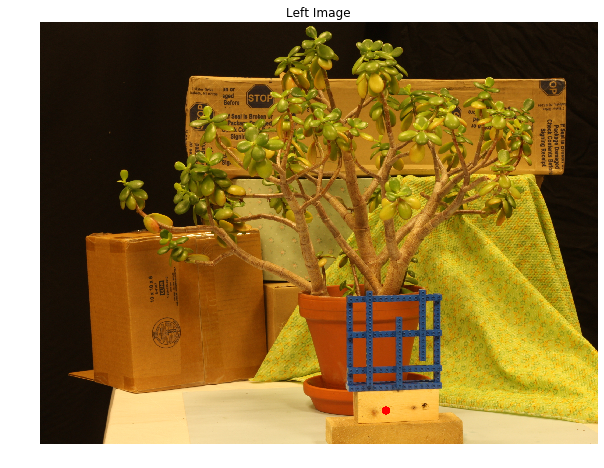

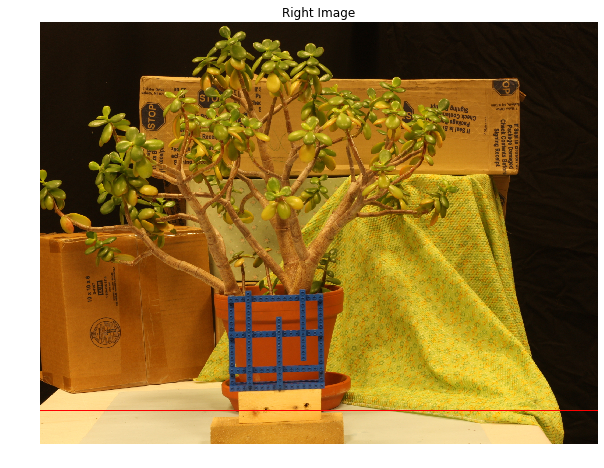

There are 526 patches
Patch List Num: 526


In [503]:
# Find fundamental Matrix
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# Find epilines & Draw Line
keypoint_list = []
keypoint_list.append(keypoint)
keypoint_list = np.int32(keypoint_list)
print(keypoint)

# Find corresponding epipolar line 
line_right = cv2.computeCorrespondEpilines(keypoint_list, 1, F)
line_right = line_right.reshape(-1, 3)

# Draw line 
color = (255, 0, 0)
row, col,__ = image_left.shape
x0, y0 = map(int, [0, -line_right[0][2]/line_right[0][1]]) # y = -c/b
x1, y1 = map(int, [col, -(line_right[0][2]+line_right[0][0]*col)/line_right[0][1]]) # y = (-a * col - c) / b
# print(x0,y0)
# print(x1,y1)
# print(image_left.shape)

# draw line and point
image_right_line_3 = image_right.copy() 
image_right_line_3 = cv2.line(image_right_line_3, (x0, y0), (x1, y1), color, 4)

# Display Image 
plt.figure(figsize=(10,10)),plt.axis('off')
plt.title("Left Image"), plt.imshow(image_left_keypoint)
plt.figure(figsize=(10,10)),plt.axis('off')
plt.title("Right Image"), plt.imshow(image_right_line_3)
plt.show()

# Get all patches 
def Patch_List(image, line, size):
    height, width,__ = image.shape
    patch_list = []
    count = 0
    for i in range(size[1]//2, width - size[1]//2, size[1]): 
        count = count + 1
        y = int(-(line[0][0]*i+line[0][2])/line[0][1])
        keypoint = (i, y)
        patch_list.append(Extract_Patch(size, keypoint, image))
    print("There are {} patches".format(count))
    return patch_list 

size = (5, 5)
image_right_patch = image_right.copy() 
patch_list = Patch_List(image_right_patch, line_right, size)
print("Patch List Num:", len(patch_list))

# Calculate Normalized Cross Correlation 
def Normalized_Cross_Correlation(reference, patch_list, line): 
    
    ncc_list = [] 
    for i in range(len(patch_list)):
        right_patch = patch_list[i] 
        nominator = np.mean((reference - reference.mean()) * (right_patch - right_patch.mean()))
        denominator = reference.std() * right_patch.std() 
        ncc = nominator / denominator 
        ncc_list.append(ncc)
    
    # Find Index of Best Matching Point with Max NCC value 
    max_ncc = max(ncc_list)

    # Find index in the ncc list 
    best_patch_index = ncc_list.index(max_ncc)
    print("Best Patch Index is: ", best_patch_index)
    
    # Plot normalized cross correlation values (on y-axis) 
    # against index of the patch in the right image (on x-axis)
    
#     x_axis_array = []
#     x0 = keypoint[0] # reference x coordinate value 
#     for i in range(len(patch_list)):
#         x1 = i * size[0] 
#         diff = x1 - x0
#         x_axis_array.append(diff)
    
    # Plot Diagram     
#     x_axis = (x_axis_array)
    x_axis = list(range(len(patch_list)))
    plt.xlabel("Patch Index")
    plt.ylabel("Normalized Cross Correlation")
    plt.plot(x_axis, ncc_list)
    plt.grid(True)
    plt.show() 
    
    #  Display found matching points in both the images
    x_coor = best_patch_index * size[0]
    y_coor  = int(-(line[0][0]*i+line[0][2])/line[0][1])
    right_circle = (x_coor, y_coor)
    colo = (255, 0, 0)
    image_right_circle = image_right.copy()
    image_right_circle = cv2.circle(image_right_circle, tuple(right_circle), 20, color, -1)
    
    # Display Images 
    plt.figure(figsize=(10,10))
    plt.subplot(221), plt.imshow(image_left_keypoint), plt.axis('off')
    plt.title("Circle On Left Image")
    plt.subplot(222),
    plt.imshow(image_right_circle), plt.axis('off')
    plt.title("Circle On Right Image")
    plt.subplot(223),
    plt.imshow(keypoint_patch), plt.axis('off')
    plt.title("Patch On Left Image")
    plt.subplot(224),
    plt.imshow(patch_list[best_patch_index])
    plt.title("Best matching Point on Right Image")
    plt.axis('off'), plt.show() 


#### 5 Plot normalized cross correlation values (on y-axis) against index of the patch in the left image (on x-axis)(refer Lecture 13 slide 57). Find the matching point with maximum normalized cross correlation value. Display found matching points in both the images. 

Best Patch Index is:  214


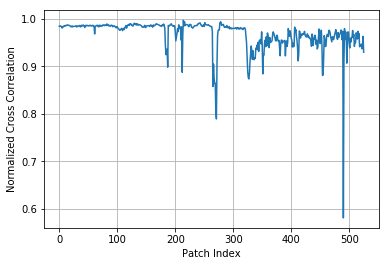

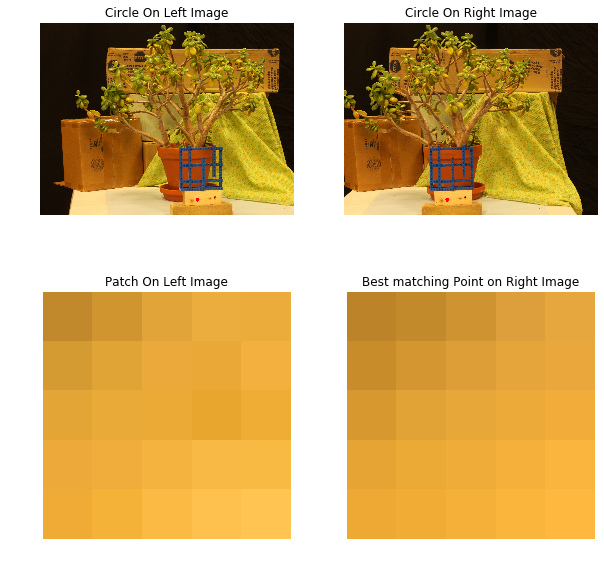

In [504]:
# Plot graph, find matching point on right image and display matching points
Normalized_Cross_Correlation(keypoint_patch, patch_list, line_right)



#### 6 Did you find exactly one matching point or multiple matches? Is the matching point you found the correct one? Explain.

As shown in the plot and in the images, there is exactly one matching point found successfully by using normalized cross correlation metric. There is a slight difference between the patch on the left and on the right. This difference in patches might be caused by the method I used to extract the patches on the right image. In my method, I extract the patch every 5 pixels, so the real matching patch can be a few pixels off comparing to the one that's found. 


# 3 Motion Algorithm - Multi-resolution Lucas- Kanade optical flow estimation 

#### You will now explore the multi-resolution Lucas-Kanade optical flow estimation algorithm discussed in class. Use the given two video frames ‘frame1.png’ and ‘frame2.png’ shown in Figure 2 for this question. You can use functions from OpenCV and matplotlib for this question. Follow each of the steps below:

#### 1 Extract good points to track from ‘frame1.png’ using the Harris corner detector. Use the openCV function goodFeaturesToTrack and set the parameter value maxCorners=500. Search for the optimal values for the parameters qualityLevel, minDistance, blockSize. 

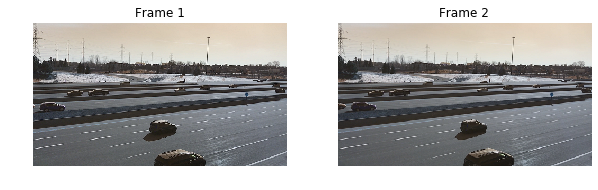

There are 81 good points


In [560]:
# Display frame 1 and frame 2 
image_frame1 = cv2.imread("frame1.png")
image_frame2 = cv2.imread("frame2.png")

image_frame1_gray = cv2.cvtColor(image_frame1, cv2.COLOR_BGR2GRAY)
image_frame2_gray = cv2.cvtColor(image_frame2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(image_frame1)
plt.axis('off'), plt.title("Frame 1")
plt.subplot(122), plt.imshow(image_frame2)
plt.axis('off'), plt.title("Frame 2")
plt.show()

# ShiTomasi Corner Detection 
feature_params = dict(maxCorners = 500,
                     qualityLevel = 0.1, 
                     minDistance = 3, 
                     blockSize = 3,
                     useHarrisDetector = True, 
                     k = 0.04)

# Find good corners 
points = cv2.goodFeaturesToTrack(image_frame1_gray, **feature_params)

print("There are {} good points".format(len(points)))


#### 2 Compute the optical flow between ‘frame1.png’ and ‘frame2.png’ for the above detected points. Use the openCV function calcOpticalFlowPyrLK. Set winSize=10, TERM CRITERIA EPS=0.03 and TERM CRITERIA COUNT=10.
#### Experiment with the maximum pyramid level by variying maxLevel parameter from 0 to 10. For each pyramid level, compute the mean of the tracking error returned by calcOpticalFlowPyrLK function for points whose correspondence search is successful. 

In [561]:
# Lucas Kanade Optical Flow 

def optical_flow(max_level): 
    lucas_kanade_params = dict(winSize = (10,10), 
                              maxLevel = max_level, 
                              criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                         10, 0.03))

    # Calculate Optical Flow 
    nextpoints, status, error = cv2.calcOpticalFlowPyrLK(image_frame1_gray, image_frame2_gray, points, None, **lucas_kanade_params)

    # Select Success Error
    success_error = error[status==1]
    average_error = sum(success_error)/len(success_error)
    
    # Select Good Points 
    good_new = nextpoints[status==1]
    good_prev = points[status==1]

    image_good_feature = image_frame1.copy() 

    color = np.random.randint(0, 255, (good_new.shape[0], 3))

    # Draw Good Point on Image 
    for i, (new, prev) in enumerate(zip(good_new, good_prev)):
        a, b = new.ravel()
        c, d = prev.ravel() 
        image_good_feature = cv2.line(image_good_feature, (a,b), (c,d), color[i].tolist(), 5)
        
    image_good_feature = cv2.cvtColor(image_good_feature, cv2.COLOR_BGR2RGB)
    
    return average_error, image_good_feature



#### 3 Display the optical flow for each setting of maximum pyramid level. Comment on the quality of the results.

Max Level is 0
Mean of Tracking Error is 7.020536204914988


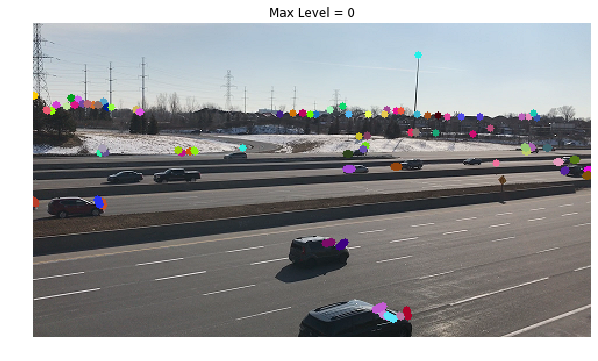

Max Level is 1
Mean of Tracking Error is 4.197411861175146


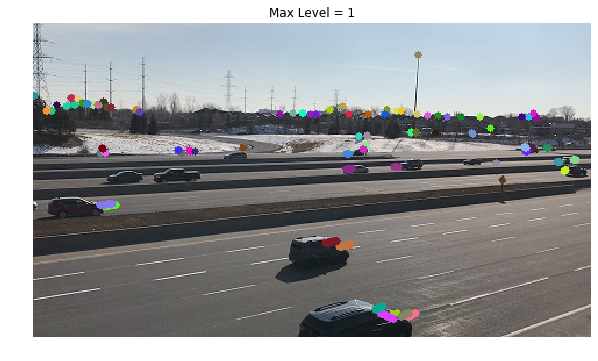

Max Level is 2
Mean of Tracking Error is 3.9898219953609417


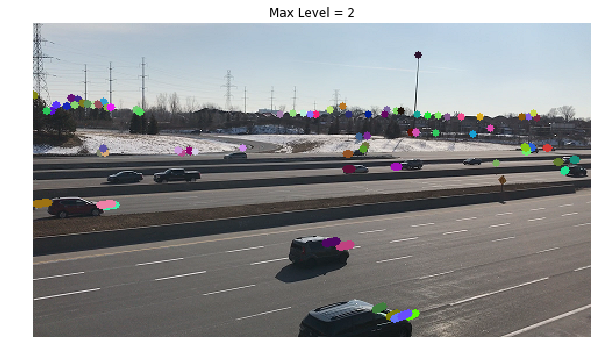

Max Level is 3
Mean of Tracking Error is 4.077606780619561


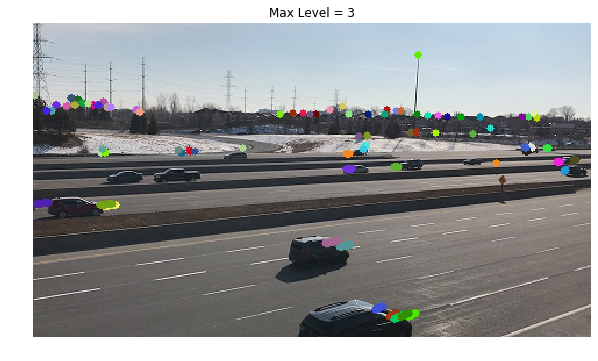

Max Level is 4
Mean of Tracking Error is 4.0936313445055035


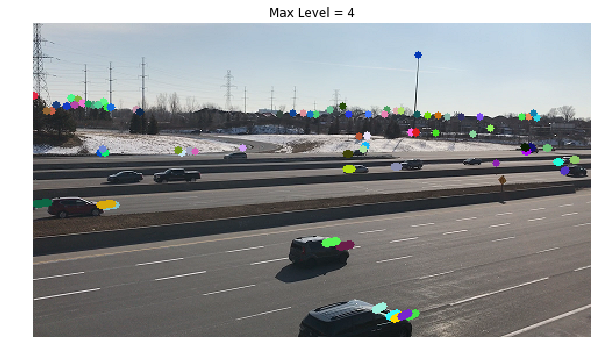

Max Level is 5
Mean of Tracking Error is 4.0936313445055035


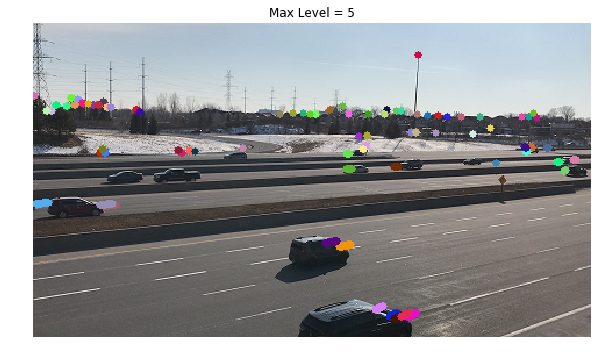

Max Level is 6
Mean of Tracking Error is 4.0936313445055035


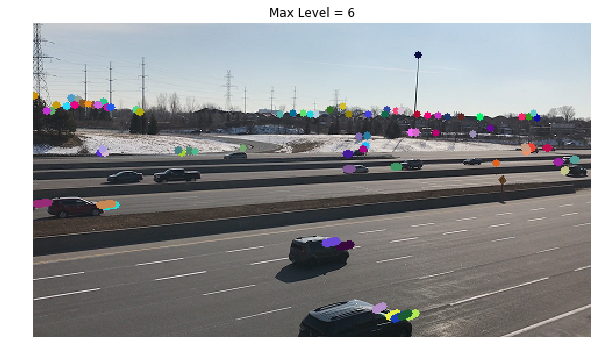

Max Level is 7
Mean of Tracking Error is 4.0936313445055035


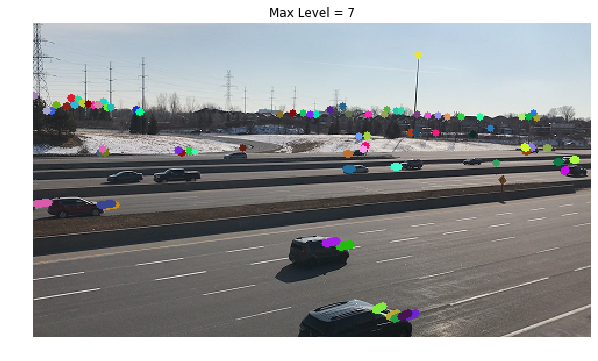

Max Level is 8
Mean of Tracking Error is 4.0936313445055035


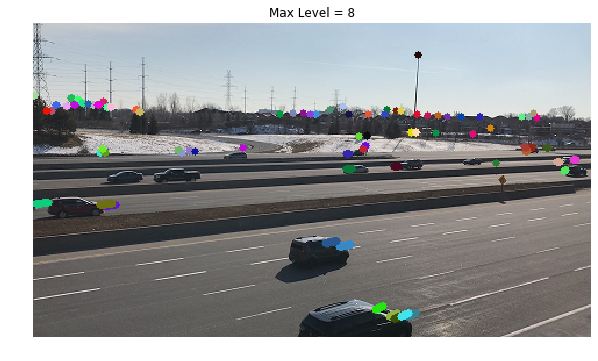

Max Level is 9
Mean of Tracking Error is 4.0936313445055035


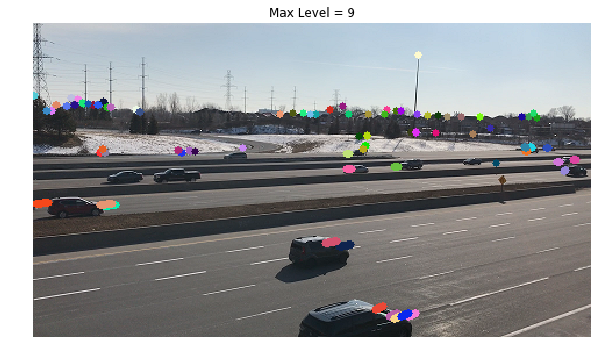

Max Level is 10
Mean of Tracking Error is 4.0936313445055035


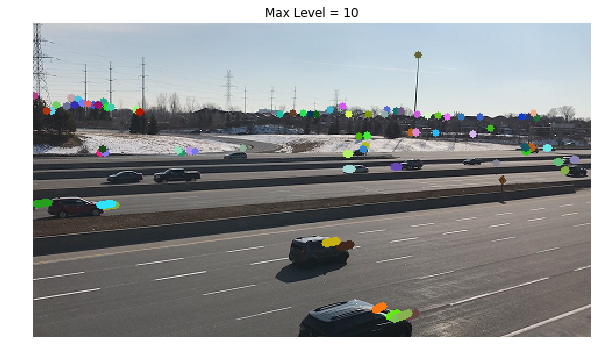

In [676]:
# Display optical flow 
average_error_list = []

for i in range(11):  
    average_error, image_good_feature = optical_flow(i)
    average_error_list.append(average_error)
    print("Max Level is {}".format(i))
    print("Mean of Tracking Error is {}".format(average_error))
    plt.figure(figsize=(10,10)), plt.title("Max Level = {}".format(i))
    plt.imshow(image_good_feature),plt.axis('off')
    plt.show() 
    

The quality of the results turns better starting from pyramid level 2. This can be obvious when observing the lines on the bottom car. These optical flow lines start poining to the correct direction starting at pyramid level 2.

#### 4 Plot the mean of the error (on y-axis) vs. pyramid level (on x-axis). Discuss the trends you observe in the plot.

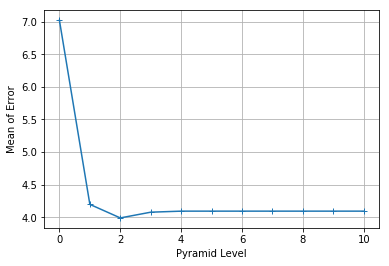

In [678]:
# Plot Diagram     
plt.xlabel("Pyramid Level")
plt.ylabel("Mean of Error")
x = (np.arange(0, 11, 1))
plt.plot(x, average_error_list, marker='+')
plt.grid(True)
plt.show() 


As shown in the plot, the mean of error drops substantially from pyramid level 0 to level 2, and reaches its minimum at pyramid level 2. However, it then plateau and does not have increase in quality. The quality of result is the best when pyramid level is 2. 